<a href="https://colab.research.google.com/github/vaishnavi-3969/Deep-Learning/blob/main/Credit_Card_Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
pip install opendatasets

In [63]:
import opendatasets as od
import pandas

od.download(
    'https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction'
    )

Skipping, found downloaded files in "./credit-card-customer-churn-prediction" (use force=True to force download)


In [64]:
path = '/content/credit-card-customer-churn-prediction/Churn_Modelling.csv'

In [65]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv(path)

In [67]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df.shape

(10000, 14)

In [69]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df.duplicated().sum()

0

In [72]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [73]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [74]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [75]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [76]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [78]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [79]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [80]:
X_train.shape

(8000, 11)

In [81]:
y_train.shape

(8000,)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
model = Sequential()

In [88]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(loss='binary_crossentropy', optimizer='Adam')

In [91]:
history = model.fit(X_train_scaled,y_train,epochs=10, validation_split=0.3)

Epoch 1/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4943 - val_loss: 0.4589
Epoch 2/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4538 - val_loss: 0.4426
Epoch 3/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4410 - val_loss: 0.4346
Epoch 4/10
175/175 [==============================] - 0s 2ms/step - loss: 0.4315 - val_loss: 0.4273
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4231 - val_loss: 0.4200
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4149 - val_loss: 0.4126
Epoch 7/10
175/175 [==============================] - 1s 3ms/step - loss: 0.4082 - val_loss: 0.4063
Epoch 8/10
175/175 [==============================] - 1s 4ms/step - loss: 0.4014 - val_loss: 0.3980
Epoch 9/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3944 - val_loss: 0.3900
Epoch 10/10
175/175 [==============================] - 0s 2ms/step - loss: 0.3865 - val_loss: 0.3847

In [92]:
model.layers[0].get_weights()

[array([[ 2.43070960e-01,  5.09921834e-02,  3.83306712e-01,
          1.62170574e-01, -3.71106684e-01,  3.15068592e-03,
          4.86831486e-01, -1.86915174e-02, -1.23330072e-01,
          5.13311736e-02, -1.26866207e-01],
        [ 8.59245956e-02, -1.76182091e-01, -5.01041293e-01,
         -4.95521903e-01,  4.19736117e-01, -6.51878655e-01,
          5.57219028e-01,  6.75352275e-01, -3.95173430e-01,
          7.99869239e-01, -7.13618696e-01],
        [ 1.98665649e-01,  3.81483734e-01,  1.43615484e-01,
         -2.41090029e-01, -6.28516311e-03,  3.56865555e-01,
         -2.41085932e-01,  2.64982879e-01,  4.57771927e-01,
         -7.64003545e-02, -3.80929708e-01],
        [ 2.25371704e-01,  6.23413362e-03,  7.88602382e-02,
         -4.53199565e-01, -1.06727771e-01, -5.11928558e-01,
         -8.39978233e-02,  1.34054914e-01,  2.50660270e-01,
         -6.13248169e-01,  3.53602737e-01],
        [-8.82576108e-01,  9.14890945e-01, -1.28204465e-01,
         -1.46671414e-01,  2.14796260e-01,  

In [93]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [94]:
y_pred = np.where(y_log > 0.5, 1,0)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.842

In [96]:
import matplotlib.pyplot as plt

In [97]:
history.history

{'loss': [0.4943287968635559,
  0.45379358530044556,
  0.44095245003700256,
  0.43152695894241333,
  0.42310672998428345,
  0.4148823320865631,
  0.40824973583221436,
  0.4014369547367096,
  0.3944319784641266,
  0.38650190830230713],
 'val_loss': [0.4589187502861023,
  0.44261810183525085,
  0.4345686435699463,
  0.4272703528404236,
  0.4200475513935089,
  0.4126226007938385,
  0.40625789761543274,
  0.39803972840309143,
  0.3900146186351776,
  0.38469886779785156]}

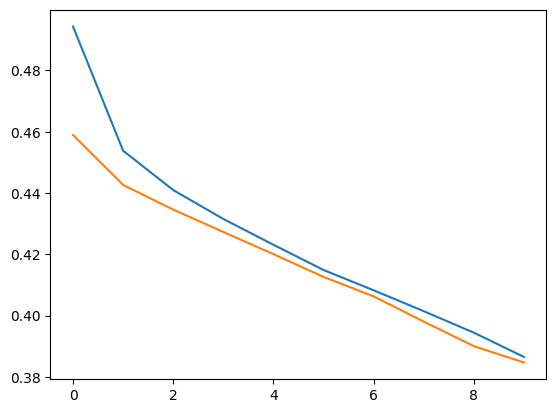

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [99]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])